In [137]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares


In [138]:
#Gets the difference in position.
def getDiffFromShrimp(shrimpPos, auvPos):
    diff = [[0,0],[0,0],[0,0],[0,0]]

    for i in range(len(auvPos)):
        diff[i] = [shrimpPos[0] - auvPos[i][0],shrimpPos[1] - auvPos[i][1]];
        
    return diff


In [180]:
#gets magnitude of position difference between each auvposition, and shrimp.

def posdiffMagnitude(diff, error=0):
    mag = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
    k = 0
    for i in range(4):
        for j in range(i+1, 4):
            mag[k] = (np.linalg.norm(diff[i])-np.linalg.norm(diff[j]))
            mag[k] = mag[k] + error;

            k = k+1
    return mag


In [494]:
auvPos = [[0,0],[0,0],[0,0],[0,0]]
pivotAuv = [20, 20];
auvPos[0] = pivotAuv;
auvPos[1] = [pivotAuv[0]+50, pivotAuv[1]];
auvPos[2] = [pivotAuv[0], pivotAuv[1]+50];
auvPos[3] = [pivotAuv[0]+50, pivotAuv[1]+50];
shrimpPos=[65,65]

posidiff = getDiffFromShrimp(shrimpPos, auvPos)
posidiff = posdiffMagnitude(posidiff)

print(posidiff)

posidiff = getDiffFromShrimp(shrimpPos, auvPos)
posidiff = posdiffMagnitude(posidiff, error=1)

print(posidiff)


[18.362684616102193, 18.362684616102193, 56.568542494923804, 0.0, 38.205857878821611, 38.205857878821611]
[17.476819153353894, 18.675982344651306, 56.562782580857231, 0.19133980301016196, 37.376463731707055, 38.349564443613282]


In [165]:
def loss(s):
    error = np.zeros(6)
    k = 0
    diff = getDiffFromShrimp(s, auvPos)
    for i in range(4):
        for j in range(i+1,4):
            #print(i,j)
            error[k] = posidiff[k]-(np.linalg.norm(diff[i])-np.linalg.norm(diff[j]))
            k = k+1
    return error

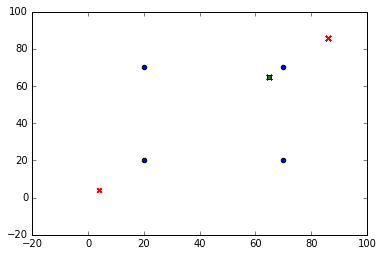

In [198]:
auvPos = [[0,0],[0,0],[0,0],[0,0]]
pivotAuv = [20, 20];
auvPos[0] = pivotAuv;
auvPos[1] = [pivotAuv[0]+50, pivotAuv[1]];
auvPos[2] = [pivotAuv[0], pivotAuv[1]+50];
auvPos[3] = [pivotAuv[0]+50, pivotAuv[1]+50];
shrimpPos=[65,65]

posidiff = getDiffFromShrimp(shrimpPos, auvPos)
posidiff = posdiffMagnitude(posidiff)

for i in range(-100, 100, 10):
    for j in range(-100, 100, 10):
        initial = [i,j]
        res = least_squares(loss, initial)
        #plt.plot([initial[0],res.x[0]], [initial[1], res.x[1]],c='r')

        plt.scatter(res.x[0], res.x[1], marker = 'x', c='r');

x,y = zip(*auvPos)
plt.scatter(x,y);

#plt.scatter(res.x[0], res.x[1], marker = 'x', c='r');
plt.scatter(shrimpPos[0], shrimpPos[1], marker = 's', c='g');
plt.show();



In [152]:
print(res.x)
print(np.arctan(res.x[1]/res.x[0]) - np.arctan(shrimpPos[1]/shrimpPos[0]))

[ 50.  55.]
0.0


In [260]:
a = np.random.randn();
a

0.47611221490918326

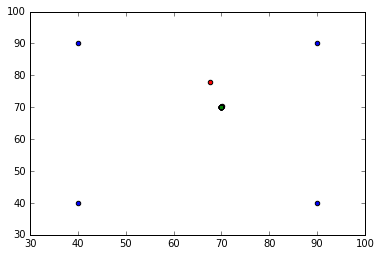

In [349]:
auvPos = [[0,0],[0,0],[0,0],[0,0]]
pivotAuv = [40, 40];
auvPos[0] = pivotAuv;
auvPos[1] = [pivotAuv[0]+50, pivotAuv[1]];
auvPos[2] = [pivotAuv[0], pivotAuv[1]+50];
auvPos[3] = [pivotAuv[0]+50, pivotAuv[1]+50];
shrimpPos=[70,70]
initial=[40, 40]
errors = []
for i in range(-1, 20, 1):
    error = 10**(-1*i)*np.random.randn();
    posidiff = getDiffFromShrimp(shrimpPos, auvPos)
    posidiff = posdiffMagnitude(posidiff, error=error)
    res = least_squares(loss, initial)
    errors.append([error, res.x])
    plt.scatter(res.x[0], res.x[1], marker = 'o', c='r');
    #print(10**(-1*i))
                  
x,y = zip(*auvPos)
plt.scatter(x,y);
plt.scatter(shrimpPos[0], shrimpPos[1], marker = 's', c='g');

plt.show();

print()

In [300]:
np.random.randn()

0.5521882748215672

In [478]:
auvr = 50; #auvrange
sr = 50; #squarerange
shr = 400; #shrimprange
errors = []
errorangle = []
for i in range(30):
    pivotAuv = [50*np.random.randn(), auvRange*np.random.randn()]
    auvPos[0] = pivotAuv;
    auvPos[1] = [pivotAuv[0]+sr, pivotAuv[1]];
    auvPos[2] = [pivotAuv[0], pivotAuv[1]+sr];
    auvPos[3] = [pivotAuv[0]+sr, pivotAuv[1]+sr];
    
    shrimpPos=[400*np.random.randn(),400*np.random.randn()]
    initial=auvPos[3]
    posidiff = getDiffFromShrimp(shrimpPos, auvPos)
    posidiff = posdiffMagnitude(posidiff, error=10**(-1*i)*np.random.randn())
    res = least_squares(loss, initial)
    errors.append((0, np.linalg.norm(res.x-shrimpPos)))
    errorangle.append((0, abs(np.arctan(res.x[1]/res.x[0]) - np.arctan(shrimpPos[1]/shrimpPos[0]))))
    
    for i in range(-1, 4, 1):
        posidiff = getDiffFromShrimp(shrimpPos, auvPos)
        posidiff = posdiffMagnitude(posidiff, error=10**(-1*i)*np.random.randn())
        res = least_squares(loss, initial)
        errors.append((10**(-1*i), np.linalg.norm(res.x-shrimpPos)))
        errorangle.append((10**(-1*i), abs(np.arctan(res.x[1]/res.x[0]) - np.arctan(shrimpPos[1]/shrimpPos[0]))))

        #plt.scatter(res.x[0], res.x[1], marker = 'o', c='r');
        #print(10**(-1*i))
                  


In [505]:
10**(-1*1)*np.random.randn()

0.04505628693120357

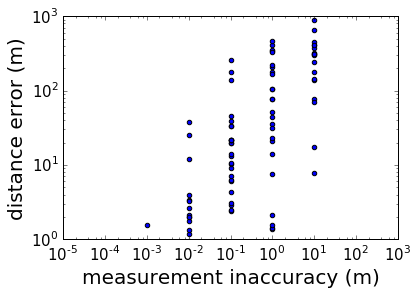

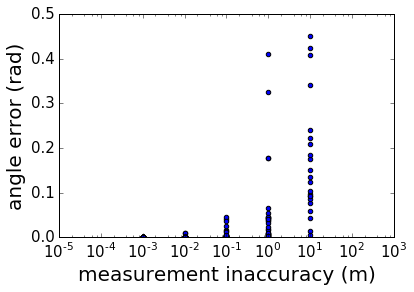

In [490]:
x,y = zip(*errors)
xa, ya = zip(*errorangle)
plt.scatter(x,y)
plt.yscale('log')
plt.xscale('log')
plt.xlim([10e-6,10e2])
plt.ylim([1, 10e2])
plt.xlabel('measurement inaccuracy (m)')
plt.ylabel('distance error (m)')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15) 
plt.rc('axes', labelsize=20)     # fontsize of the axes title
plt.show();


plt.scatter(xa,ya)
plt.xscale('log')
plt.xlim([10e-6,10e2])
plt.ylim([0, 0.5])
plt.xlabel('measurement inaccuracy (m)')
plt.ylabel('angle error (rad)')
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('axes', labelsize=20) 
plt.show();


In [469]:
errorangle

[(10, 0.047346872315209454),
 (1, 0.023560875574611118),
 (0.1, 0.00030117187551914615),
 (0.01, 5.7133456439095731e-05),
 (0.001, 2.5559855285794963e-05),
 (10, 0.4073042637230711),
 (1, 0.032872464176409766),
 (0.1, 0.41457550473827731),
 (0.01, 0.4140162548477867),
 (0.001, 0.41402419726752382),
 (10, 0.70222780364331661),
 (1, 0.031221652260588706),
 (0.1, 0.0030369944647009595),
 (0.01, 0.0015875350789856801),
 (0.001, 0.00012469008299120787),
 (10, 1.5129630318937488),
 (1, 0.0019772759866195644),
 (0.1, 0.0046063209344548994),
 (0.01, 0.00022758195608330034),
 (0.001, 2.6929529525543394e-05),
 (10, 0.00077317405082938384),
 (1, 0.02881299069078741),
 (0.1, 0.0036811269138768699),
 (0.01, 6.819403424201953e-06),
 (0.001, 6.7283946921237181e-06),
 (10, 2.3807227298556923),
 (1, 0.00063694353475973742),
 (0.1, 0.000700788059063151),
 (0.01, 4.3962216219495254e-05),
 (0.001, 5.1062216271380301e-05),
 (10, 0.015051411904402345),
 (1, 0.0014296420344423466),
 (0.1, 0.00010188888669870

In [215]:
print(res.x)
print(np.arctan(res.x[1]/res.x[0]) - np.arctan(shrimpPos[1]/shrimpPos[0]))

[-11745. -11745.]
0.0


In [216]:
posidiff = getDiffFromShrimp(shrimpPos, auvPos)
posidiff = posdiffMagnitude(posidiff, error=1e-3)
posidiff

[0.00046378442318079831,
 -1.5064823166743319e-05,
 0.0012538075735702584,
 0.00066696091026603819,
 0.00061682473995828624,
 0.00044789025839272448]

In [187]:
posidiff = getDiffFromShrimp(shrimpPos, auvPos)
posidiff = posdiffMagnitude(posidiff, error=0)
posidiff

[18.362684616102193,
 18.362684616102193,
 56.568542494923804,
 0.0,
 38.205857878821611,
 38.205857878821611]

In [185]:
posidiff

[0.00013036843791880415,
 -38.205715206028898,
 18.361489024373682,
 -38.205845574466814,
 18.361358655935764,
 56.567204230402581]

In [512]:
auvPos[0] = [-91, 731]
auvPos[1] = [-96, 687]
auvPos[2] = [-12, 675]
auvPos[3] = [-43, 723];
shrimpPos=[-58, 688]
initial=[-120, -80]
posidiff = getDiffFromShrimp(shrimpPos, auvPos)
posidiff = posdiffMagnitude(posidiff, error=0)
res = least_squares(loss, initial)

In [511]:
ires.x

array([ -58.,  688.])

In [513]:
posidiff = getDiffFromShrimp(shrimpPos, auvPos)
posidiff = posdiffMagnitude(posidiff, error=0)

In [516]:
posidiff

[16.190165313974184,
 6.4016473206021303,
 16.124455402151064,
 -9.7885179933720536,
 -0.065709911823120137,
 9.7228080815489335]

In [518]:
newList = [x / 1498 for x in posidiff]

In [527]:
newList

[0.010807854014669015,
 0.0042734628308425436,
 0.010763988919994034,
 -0.006534391183826471,
 -4.3865094674980062e-05,
 0.0064905260891514908]

In [525]:
a = np.array([ 0.02529732, -0.01661043, -0.01995389, -0.04190776, -0.04525122,
       -0.00334346])

In [526]:
newList - a

array([-0.01448947,  0.02088389,  0.03071788,  0.03537337,  0.04520735,
        0.00983399])